In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from xgboost import XGBRegressor

In [101]:
gold_data = pd.read_csv("gld_price_data.csv")

In [102]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


Date - date (MM/dd/yyyy format)
SPX - stands for The Standard and Poor's 500 index, or simply the S&P 500. It is a stock market index used for tracking the stock performance of 500 of the largest companies listed on stock exchanges in USA
GLD - gold price
USO - stands for "The United States Oil Fund ® LP (USO)". It is an exchange-traded security whose shares may be purchased and sold on the NYSE Arca
SLV - silver price
EUR/USD - Euro to US dollar exchange ratio


In [103]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [104]:
gold_data.shape

(2290, 6)

In [105]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [106]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [107]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [108]:
gold_data.drop("Date", axis=1, inplace=True)

In [109]:
correlation = gold_data.corr()

<Axes: >

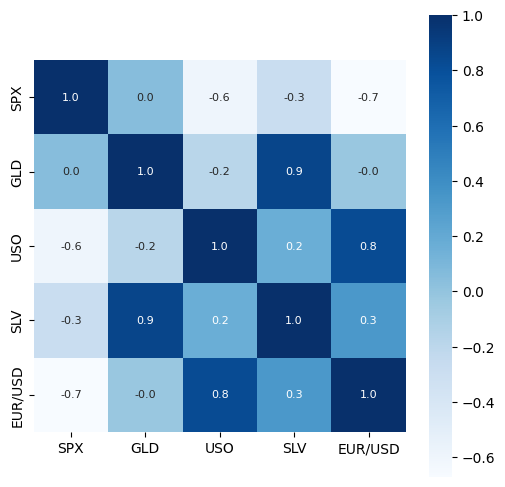

In [110]:
plt.figure(figsize = (6,6))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [111]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


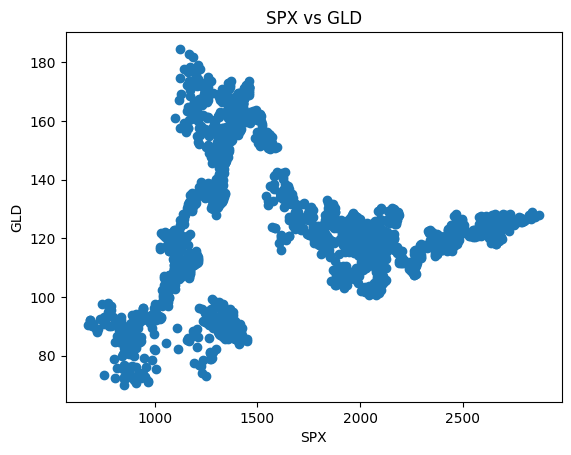

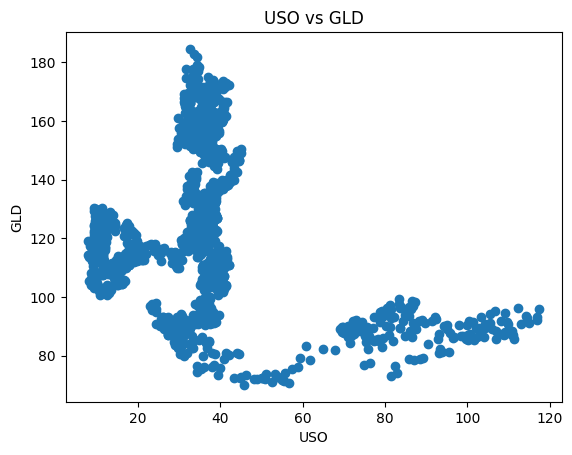

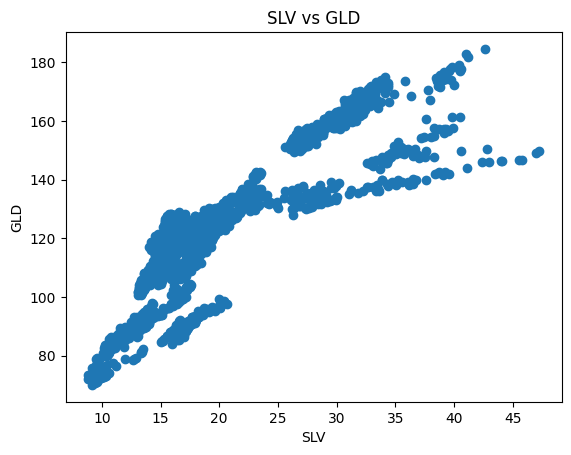

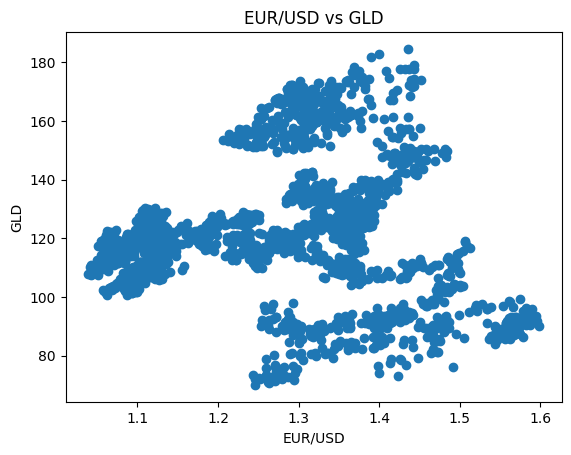

In [112]:

plt.scatter(gold_data['SPX'], gold_data['GLD'])
plt.xlabel('SPX')
plt.ylabel('GLD')
plt.title('SPX vs GLD')
plt.show()


plt.scatter(gold_data['USO'], gold_data['GLD'])
plt.xlabel('USO')
plt.ylabel('GLD')
plt.title('USO vs GLD')
plt.show()

plt.scatter(gold_data['SLV'], gold_data['GLD'])
plt.xlabel('SLV')
plt.ylabel('GLD')
plt.title('SLV vs GLD')
plt.show()


plt.scatter(gold_data['EUR/USD'], gold_data['GLD'])
plt.xlabel('EUR/USD')
plt.ylabel('GLD')
plt.title('EUR/USD vs GLD')
plt.show()


C:\Users\abdul\AppData\Local\Temp\ipykernel_11084\4227780549.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

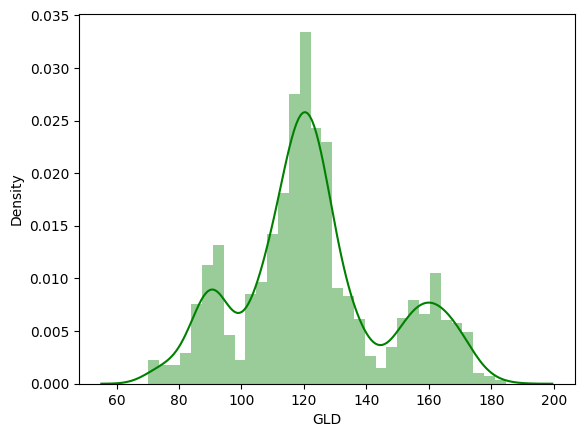

In [113]:
sns.distplot(gold_data['GLD'],color='green')

In [114]:
X = gold_data.drop('GLD',axis=1)
Y = gold_data['GLD']

In [115]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [117]:
regressor_RF = RandomForestRegressor(n_estimators=100)

In [118]:
regressor_RF.fit(X_train,Y_train)

RandomForestRegressor()

In [119]:
test_data_prediction = regressor_RF.predict(X_test)

In [120]:
error_score_RF = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score_RF)


mse = metrics.mean_squared_error(Y_test, test_data_prediction)
print(f"Random Forest MSE: {mse}")

R squared error :  0.988856538133161
Random Forest MSE: 5.8775465364454655


In [121]:
Y_test = list(Y_test)

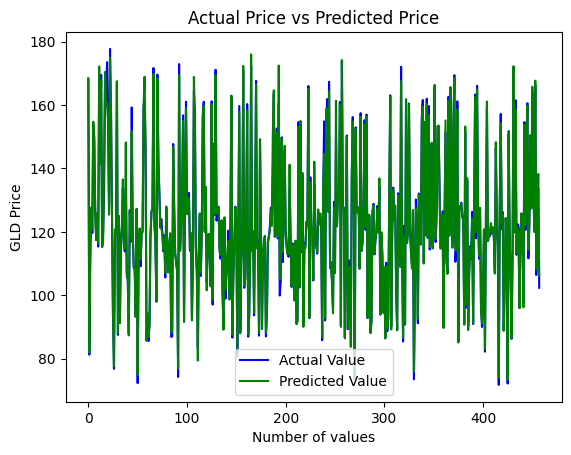

In [122]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [123]:
regressor_XGboost = XGBRegressor()

In [124]:
regressor_XGboost.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [125]:
prediction_xgboost = regressor_XGboost.predict(X_test)

In [126]:
error_score_xgboost = metrics.r2_score(Y_test, prediction_xgboost)
print("R squared error : ", error_score_xgboost)

mse = metrics.mean_squared_error(Y_test, prediction_xgboost)
print(f"MSE: {mse}")

R squared error :  0.9873849153518677
MSE: 6.653740406036377


------------ if we consider the time series prediction ----------------

In [127]:
data = pd.read_csv('gld_price_data.csv')

train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

X_train, y_train = train.drop(columns=['GLD', 'Date']), train['GLD']
X_test, y_test = test.drop(columns=['GLD', 'Date']), test['GLD']

In [128]:

rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)


rf_predictions = rf_model.predict(X_test)

error_score_time = metrics.r2_score(y_test, rf_predictions)
print("R squared error : ", error_score_time)

# Evaluate
rf_mse = metrics.mean_squared_error(y_test, rf_predictions)
print(f"Random Forest MSE: {rf_mse}")

R squared error :  -0.44306364411480414
Random Forest MSE: 33.81571697665855
